### SETUP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics
pd.set_option("display.precision", 2)


In [ ]:
def dim_red_pca(X, d=0, corr=False):
    r"""
    Performs principal component analysis.

    Parameters
    ----------
    X : array, (n, d)
        Original observations (n observations, d features)

    d : int
        Number of principal components (default is ``0`` => all components).

    corr : bool
        If true, the PCA is performed based on the correlation matrix.

    Notes
    -----
    Always all eigenvalues and eigenvectors are returned,
    independently of the desired number of components ``d``.

    Returns
    -------
    Xred : array, (n, m or d)
        Reduced data matrix

    e_values : array, (m)
        The eigenvalues, sorted in descending manner.

    e_vectors : array, (n, m)
        The eigenvectors, sorted corresponding to eigenvalues.

    """
    # Center to average
    X_ = X-X.mean(0)
    # Compute correlation / covarianz matrix
    if corr:
        CO = np.corrcoef(X_.T)
    else:
        CO = np.cov(X_.T)
    # Compute eigenvalues and eigenvectors
    e_values, e_vectors = sp.linalg.eigh(CO)

    # Sort the eigenvalues and the eigenvectors descending
    idx = np.argsort(e_values)[::-1]
    e_vectors = e_vectors[:, idx]
    e_values = e_values[idx]
    # Get the number of desired dimensions
    d_e_vecs = e_vectors
    if d > 0:
        d_e_vecs = e_vectors[:, :d]
    else:
        d = None
    # Map principal components to original data
    LIN = np.dot(d_e_vecs, np.dot(d_e_vecs.T, X_.T)).T
    return LIN[:, :d], e_values, e_vectors

In [ ]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    # ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    # ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax1.set_xlabel("number of componontes")
    ax1.set_ylabel("Accuracy")
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax1.set_yticklabels(['{:,.1%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

## Imports

1. run Kmeans and dbscan on the data

מצאו את הפרמטרים האופטימאלים למודלים. הסבירו והראו כיצד מצאתם אותם, הוסיפו גרפים מתאימים

בחנו את ביצועי המודלים בעזרת מדדים המתאימים לבעיות קלאסטרינג והשוו בין שתי השיטות שהצגתם

הציגו את אופן החלוקה של כל מודל לקאלסטרים (בגרפים נפרדים)

In [ ]:
data_df = pd.read_csv("/content/drive/MyDrive/University Projects/Introduction To Data Science/clustering_data.csv")

In [ ]:
df = data_df.loc[:,'feature 1':]

## EDA

In [ ]:
df.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10
0,-1.78,9.14,2.52,-6.69,3.33,-6.19,-8.29,-5.53,-9.15,-3.44
1,4.51,-6.24,-9.76,8.98,0.21,-5.61,6.19,-0.25,-1.00,-9.09
2,1.08,-6.81,-11.35,11.59,1.22,-4.48,5.12,-0.04,-2.31,-5.82
3,-0.20,-6.10,10.39,-3.53,-6.38,3.44,-0.33,-3.78,-6.92,-3.46
4,-4.49,9.54,0.41,-3.30,4.84,-6.93,-9.12,-3.14,-10.18,-3.27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature 1   2500 non-null   float64
 1   feature 2   2500 non-null   float64
 2   feature 3   2500 non-null   float64
 3   feature 4   2500 non-null   float64
 4   feature 5   2500 non-null   float64
 5   feature 6   2500 non-null   float64
 6   feature 7   2500 non-null   float64
 7   feature 8   2500 non-null   float64
 8   feature 9   2500 non-null   float64
 9   feature 10  2500 non-null   float64
dtypes: float64(10)
memory usage: 195.4 KB


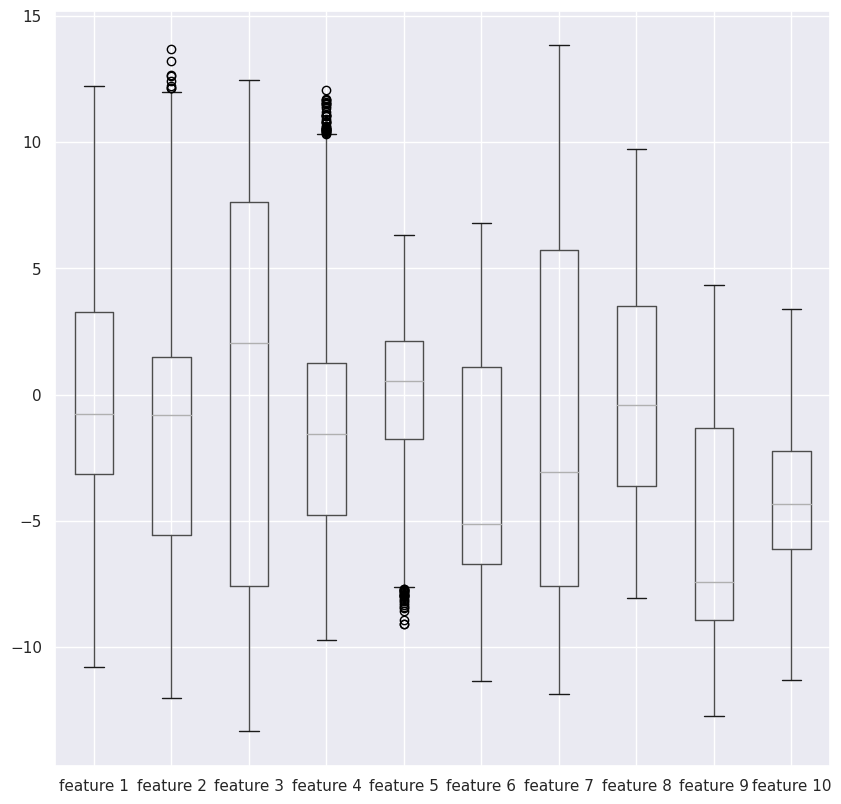

In [ ]:
boxplot = df.boxplot(figsize=(10,10))

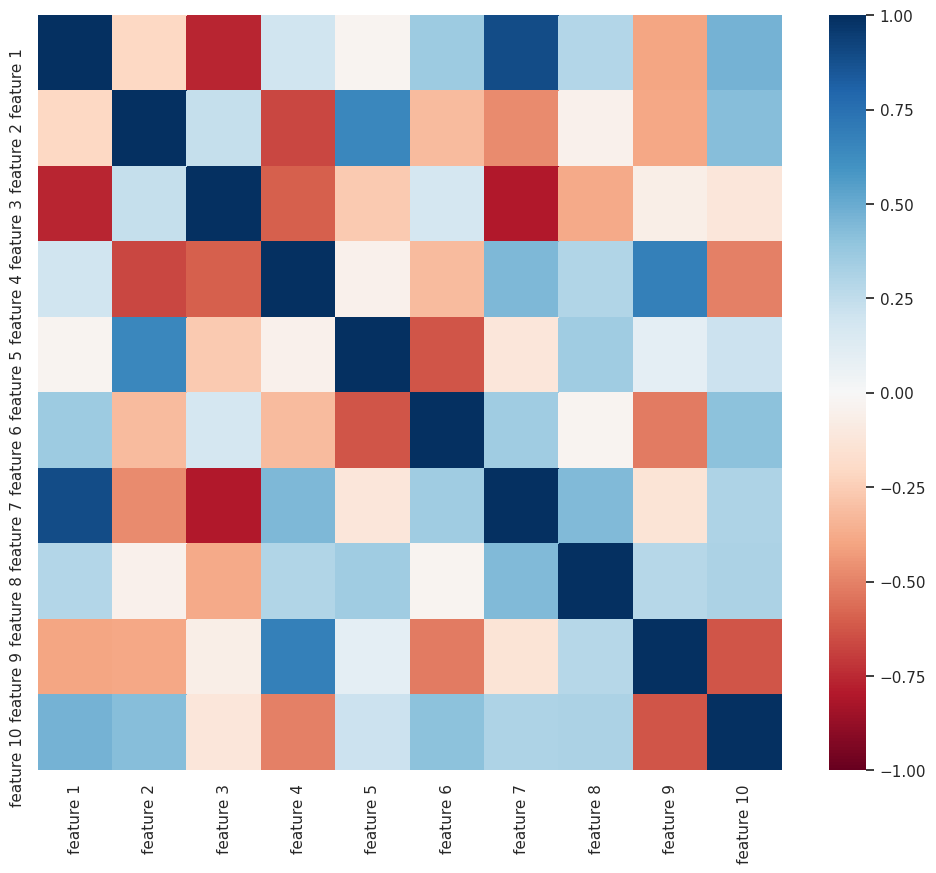

In [ ]:
import seaborn as sns

# load the R package ISLR

# # load the Auto dataset
# auto_df = com.load_data('Auto')

# calculate the correlation matrix
corr = df.corr()
plt.figure(figsize = (12,10))

# plot the heatmap
sns.heatmap(corr, vmax=1, vmin=-1, center=0,
            cmap='RdBu',
            
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [ ]:
df.corr()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10
feature 1,1.00,-0.21,-0.76,0.20,-0.03,0.36,0.89,0.29,-0.39,0.48
feature 2,-0.21,1.00,0.24,-0.67,0.65,-0.31,-0.47,-0.05,-0.39,0.43
feature 3,-0.76,0.24,1.00,-0.60,-0.26,0.17,-0.80,-0.38,-0.06,-0.12
feature 4,0.20,-0.67,-0.60,1.00,-0.05,-0.32,0.45,0.30,0.69,-0.51
feature 5,-0.03,0.65,-0.26,-0.05,1.00,-0.63,-0.12,0.35,0.10,0.22
feature 6,0.36,-0.31,0.17,-0.32,-0.63,1.00,0.36,-0.02,-0.52,0.41
feature 7,0.89,-0.47,-0.80,0.45,-0.12,0.36,1.00,0.44,-0.13,0.31
feature 8,0.29,-0.05,-0.38,0.30,0.35,-0.02,0.44,1.00,0.29,0.32
feature 9,-0.39,-0.39,-0.06,0.69,0.10,-0.52,-0.13,0.29,1.00,-0.63
feature 10,0.48,0.43,-0.12,-0.51,0.22,0.41,0.31,0.32,-0.63,1.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


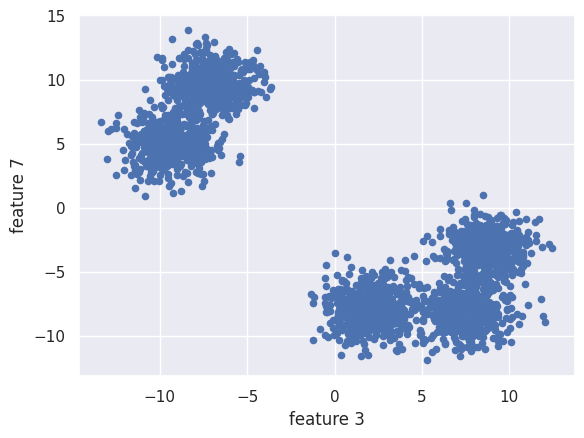

In [ ]:
df.plot(kind = 'scatter', x = 'feature 3', y = 'feature 7')
plt.show()

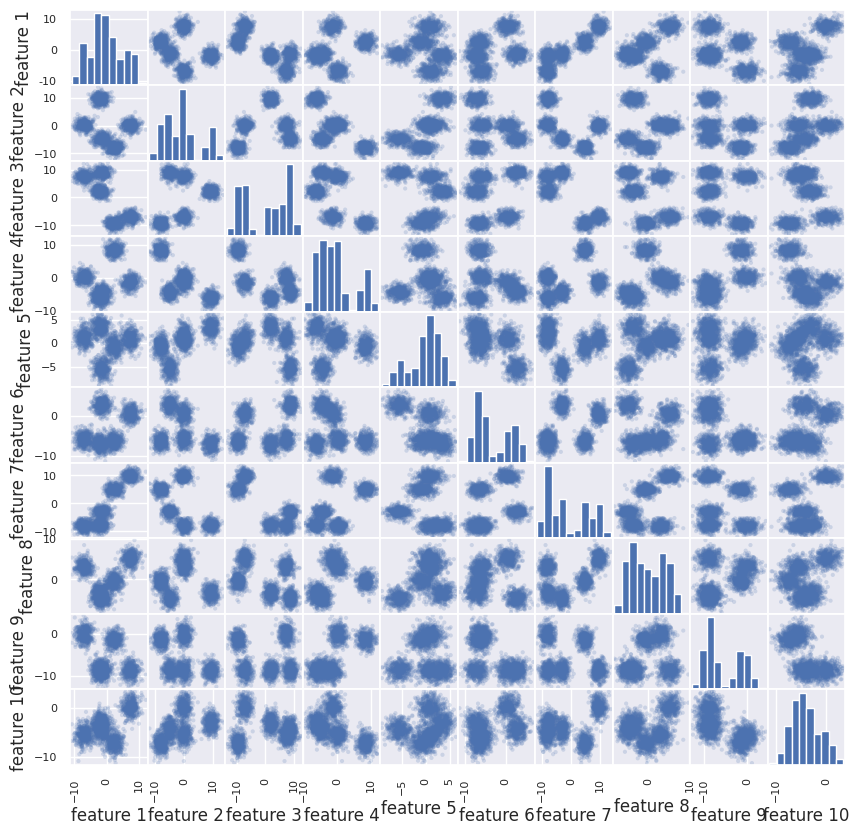

In [ ]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10,10))
plt.show()

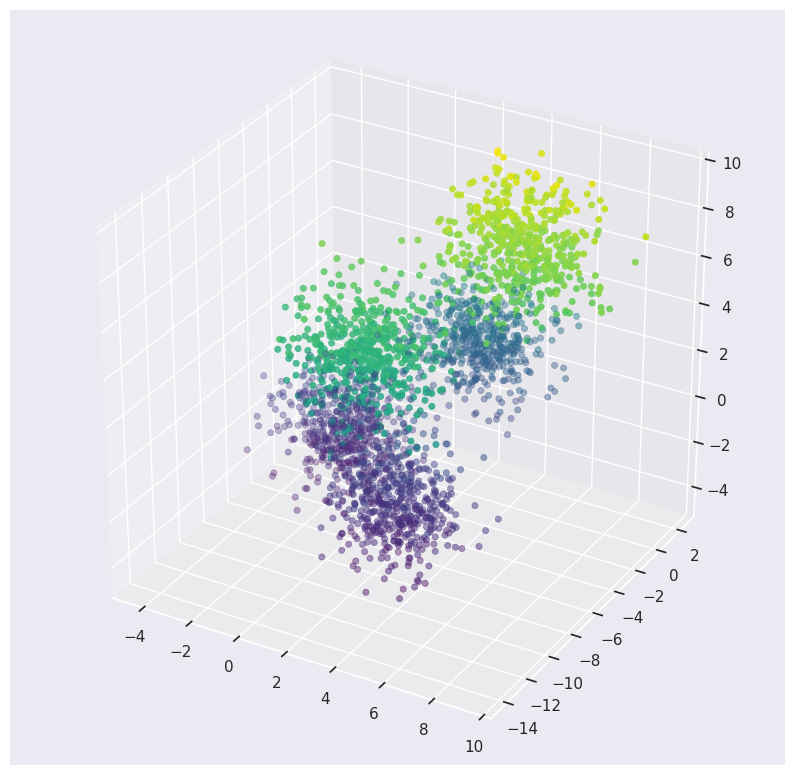

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure(figsize=(10,10))
ax = Axes3D(fig)

ax = plt.axes(projection='3d')
x = df['feature 1'] 
y = df['feature 3']
z = df['feature 7']
ax.set_xlim(-5, 10); ax.set_ylim(-15, 3); ax.set_zlim(-5, 10);

ax.scatter(x, y, z,  c=z, cmap='viridis', linewidth=0.5);
pyplot.show()

## Kmeans

### Elbow

*Running* K-Means with a range of k

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

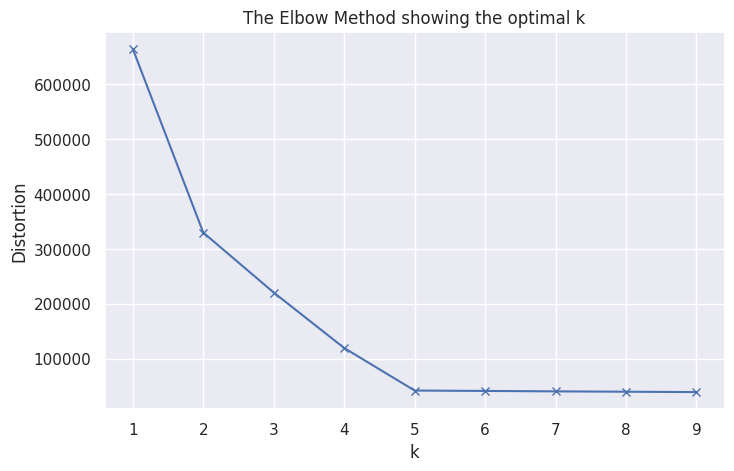

In [ ]:
# Plotting the distortions of K-Means
# Sum of squared distances of samples to their closest cluster center
plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

###Run Kmeans model 5 clusters

In [ ]:
import scipy as sp
from scipy.cluster.vq import kmeans2
t0 = time()
clust,labels_ = kmeans2(df,5, minit="random", iter=100)    # cluster with 5 random initial clusters
kmeans_metrica = {
    'time': time() - t0,
    'Silhouette Coefficient': metrics.silhouette_score(df, labels_, metric='euclidean'), 
         'Clusters': 5,
         'Noise Points': "-"}

kmeans_metrica

{'Clusters': 5,
 'Noise Points': '-',
 'Silhouette Coefficient': 0.7100351450387195,
 'time': 0.06424260139465332}

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'points')

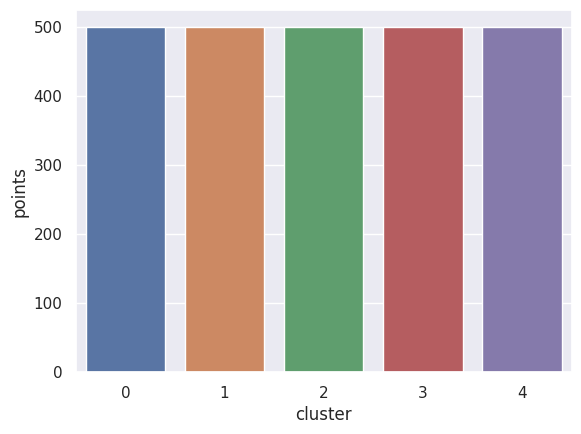

In [ ]:
sns.countplot(labels_)
plt.xlabel("cluster")
plt.ylabel("points")

In [ ]:
#The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
from sklearn import metrics
metrics.silhouette_score(df, labels_, metric='euclidean')

0.7100351450387195

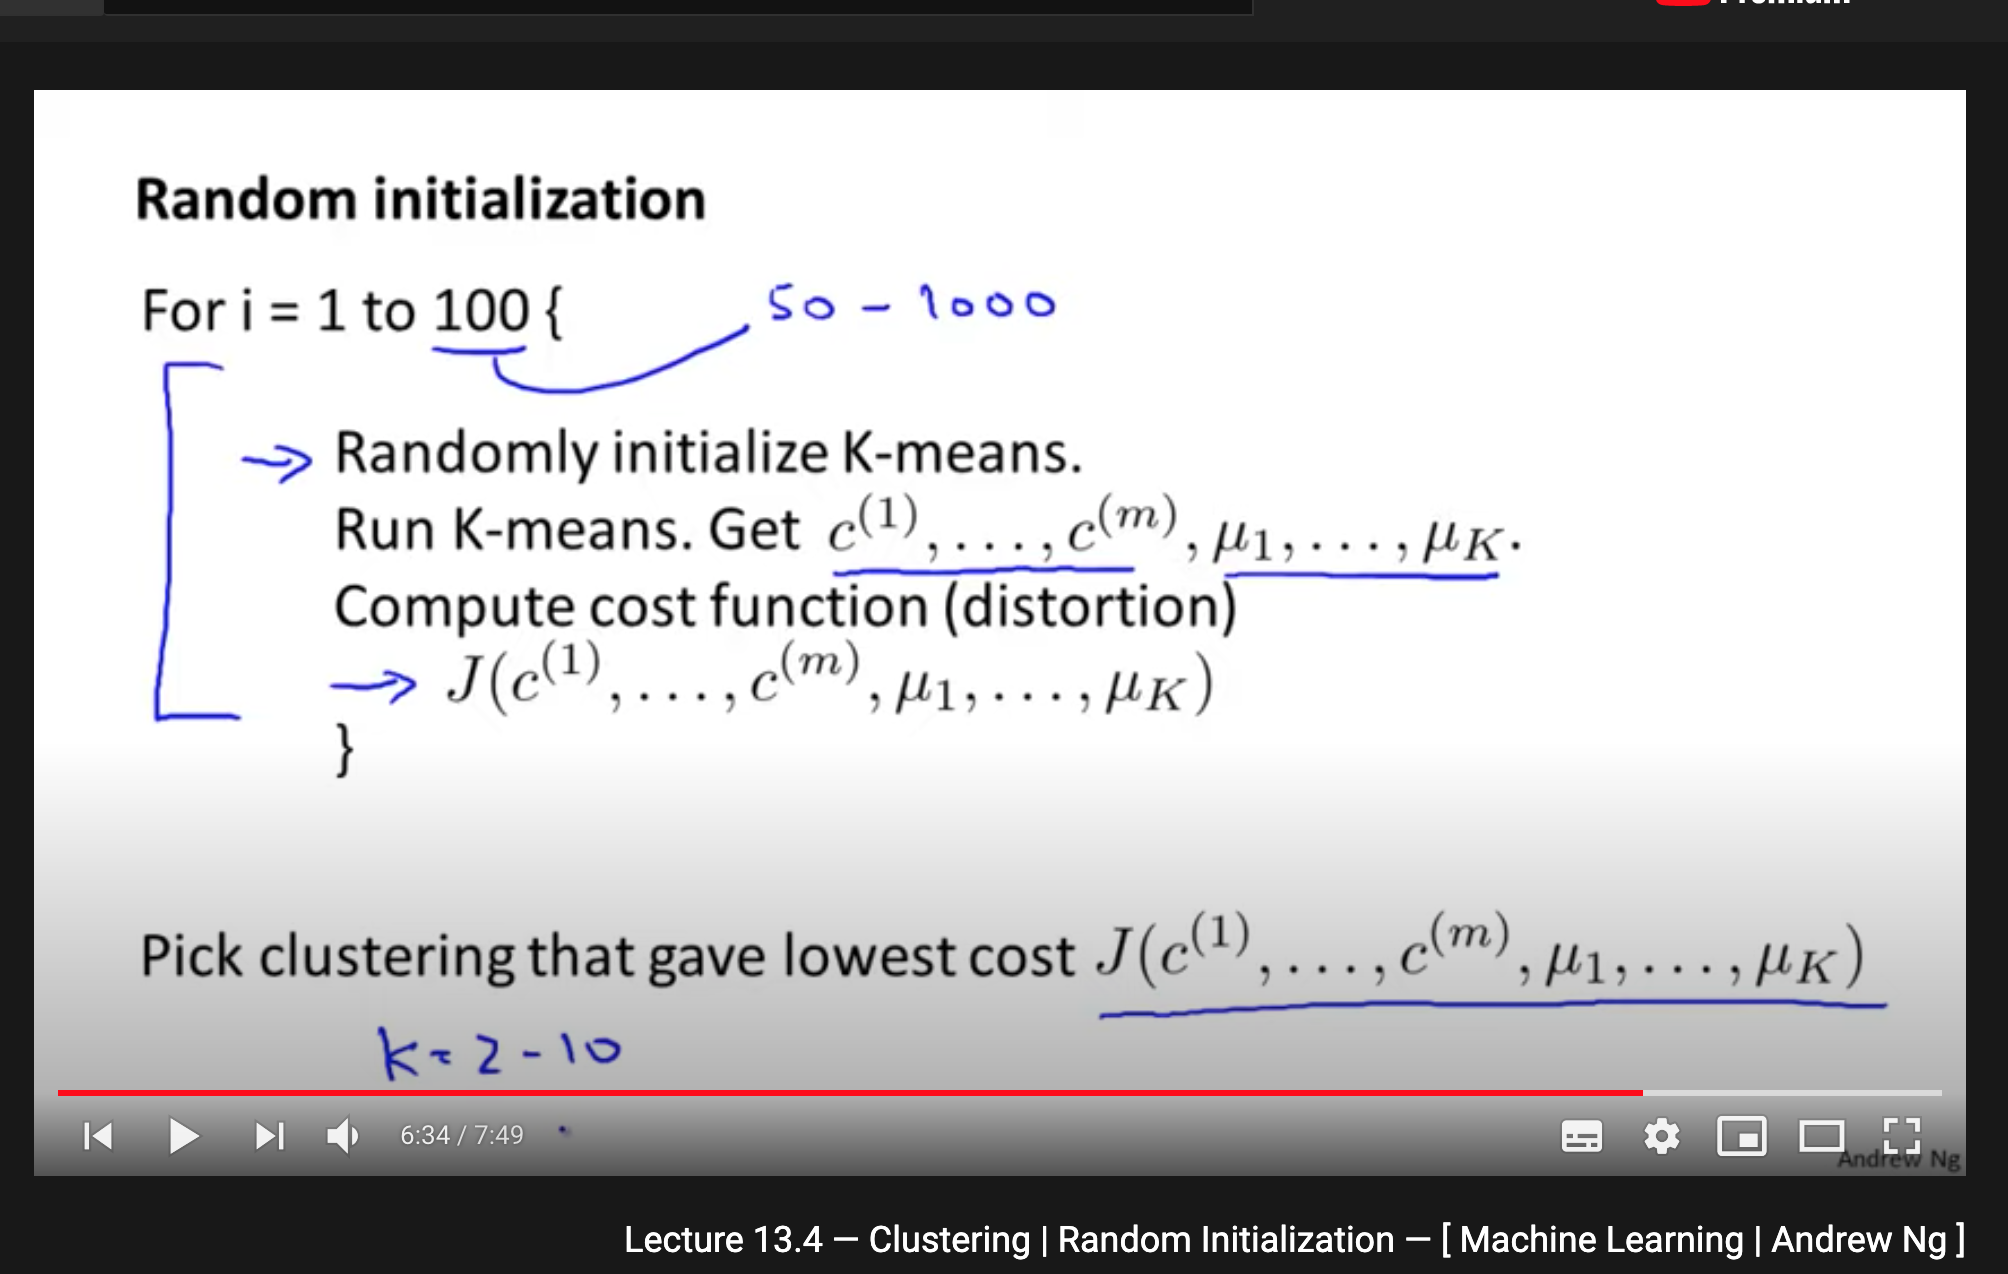

## DBSCAN

### Choosing parametres

In [ ]:
## Load data and Compute DBSCAN

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# fit_transform  data

X = StandardScaler().fit_transform(df)

# #############################################################################

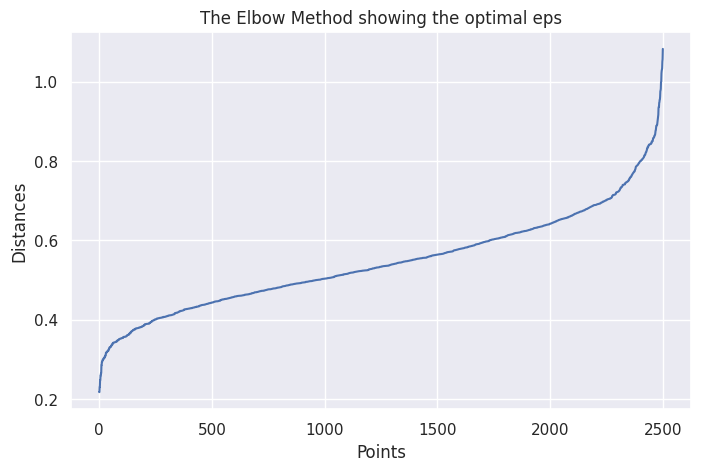

In [ ]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,5))
plt.xlabel('Points')
plt.ylabel('Distances')
plt.title('The Elbow Method showing the optimal eps')
plt.plot(distances)

### run DBSCAN model

In [ ]:

# Compute DBSCAN 
t0 = time()
db = DBSCAN(eps=0.8, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
# Intitialise data of lists  
dbscan_metrica = {
    'time': time() - t0,
    'Silhouette Coefficient': metrics.silhouette_score(X, labels, metric='euclidean'), 
         'Clusters': n_clusters_,
         'Noise Points': n_noise_}

  

dbscan_metrica

Estimated number of clusters: 5
Estimated number of noise points: 139
Silhouette Coefficient: 0.621


{'Clusters': 5,
 'Noise Points': 139,
 'Silhouette Coefficient': 0.6205808043155271,
 'time': 0.2342681884765625}

### Plot result


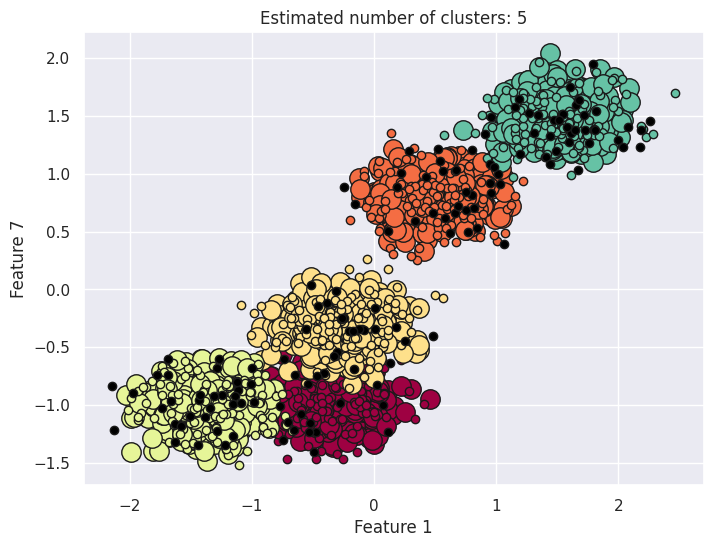

In [ ]:
# Plot result
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)
plt.figure(figsize=(8,6))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 6], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 6], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 7')
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'points')

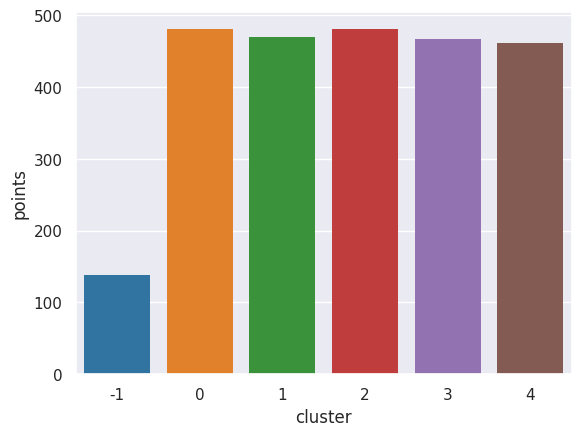

In [ ]:
sns.countplot(labels)
plt.xlabel("cluster")
plt.ylabel("points")

# Analysis

### PCA analysis

In [ ]:
# PCA on orig. dataset 
# Xred will have only 2 columns, the first two princ. comps.
# evals has shape (4,) and evecs (4,4). We need all eigenvalues 
# to determine the portion of variance
Xred, evals, evecs = dim_red_pca(df,4)   

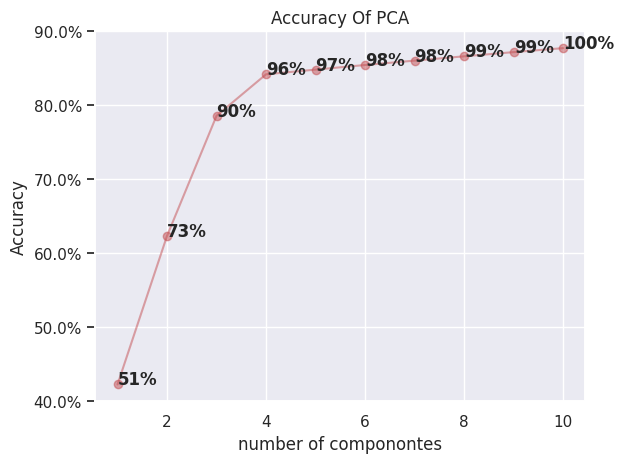

In [ ]:
from pandas import DataFrame

precsions = pd.DataFrame(evals,columns=['precsion'])
precsions['components'] = range(1, len(precsions) + 1)
pareto_plot(precsions, x='components', y='precsion', title='Accuracy Of PCA')


[Text(0, 0.5, 'Weight'), Text(0.5, 0, 'Features')]

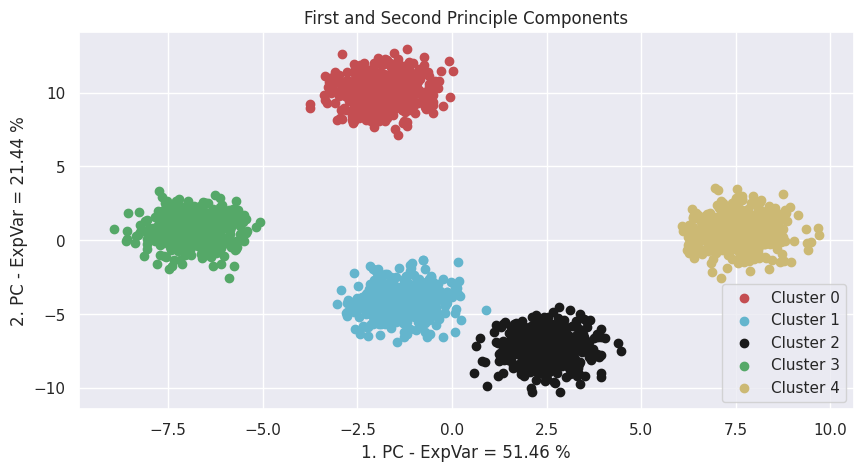

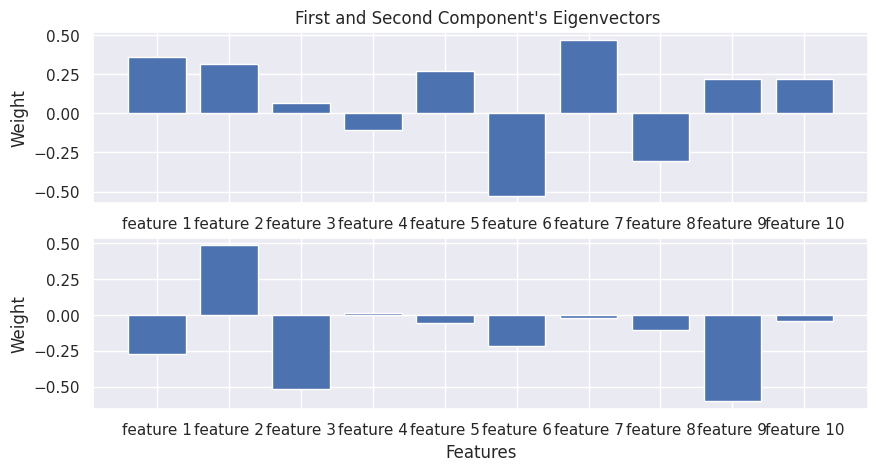

In [ ]:
Xred.shape

ylab = '2. PC - ExpVar = {:.2f} %'.format(evals[4]/sum(evals)*100)
ylab
evals
xlab = '1. PC - ExpVar = {:.2f} %'.format(evals[0]/sum(evals)*100) # determine variance portion
ylab = '2. PC - ExpVar = {:.2f} %'.format(evals[1]/sum(evals)*100)
# plot the clusters, each set separately
plt.figure(figsize=(10,5))    
ax = plt.gca()
scatterHs = []
clr = ['r', 'c', 'k', 'g', 'y']
for cluster in set(labels_):
    scatterHs.append(ax.scatter(Xred[labels_ == cluster, 0], Xred[labels_ == cluster, 1], 
                   color=clr[cluster], label='Cluster {}'.format(cluster)))
plt.legend(handles=scatterHs,loc=4)
plt.setp(ax, title='First and Second Principle Components', xlabel=xlab, ylabel=ylab)
# plot also the eigenvectors for deriving the influence of each feature

fig, ax = plt.subplots(2,1,  figsize=(10,5))

ax[0].bar(df.columns,evecs[0])
plt.setp(ax[0], title="First and Second Component's Eigenvectors ", ylabel='Weight')
ax[1].bar(df.columns,evecs[1])
plt.setp(ax[1], xlabel='Features', ylabel='Weight')

## PCA 2d plot for k-means

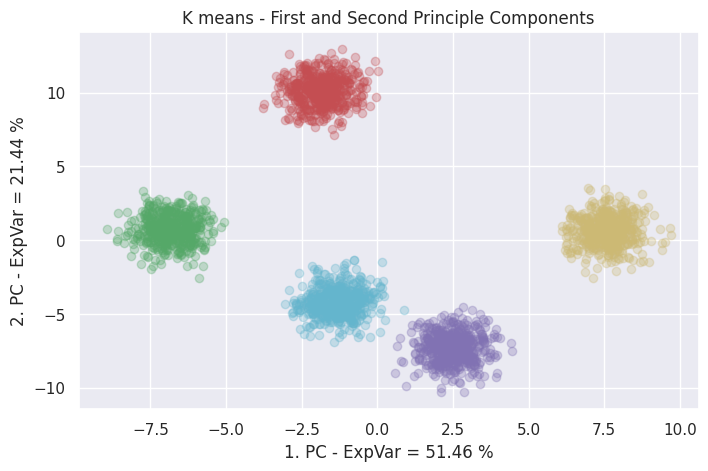

In [ ]:
# ## PCA 2d plot for k-means
xlab = '1. PC - ExpVar = {:.2f} %'.format(evals[0]/sum(evals)*100) # determine variance portion
ylab = '2. PC - ExpVar = {:.2f} %'.format(evals[1]/sum(evals)*100)
# plot the clusters, each set separately
plt.figure(figsize=(8,5))    
ax = plt.gca()
scatterHs = []
clr = ['r', 'c', 'm', 'g', 'y']
for cluster in set(labels_):
    scatterHs.append(ax.scatter(Xred[labels_ == cluster, 0], Xred[labels_ == cluster, 1], 
                                alpha=0.3, marker="o",
                   color=clr[cluster], label='Cluster {}'.format(cluster)))
# plt.legend(handles=scatterHs,loc=4)
plt.setp(ax, title='K means - First and Second Principle Components', xlabel=xlab, ylabel=ylab)
plt.show()

## PCA 2d plot for dbscan

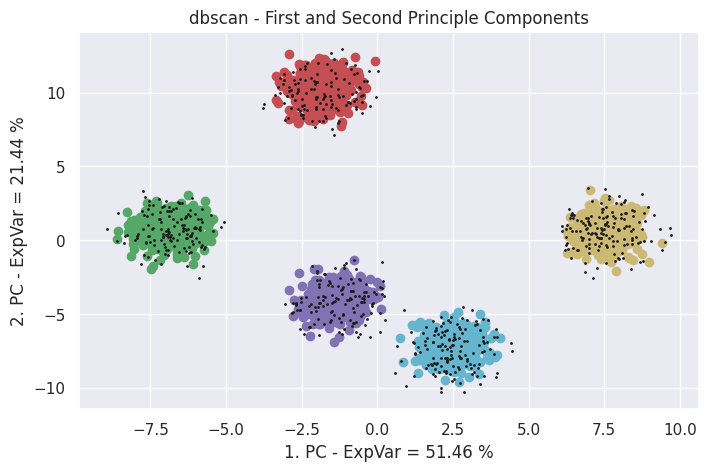

In [ ]:
# ## PCA 2d plot for dbscan
xlab = '1. PC - ExpVar = {:.2f} %'.format(evals[0]/sum(evals)*100) # determine variance portion
ylab = '2. PC - ExpVar = {:.2f} %'.format(evals[1]/sum(evals)*100)
# plot the clusters, each set separately
plt.figure(figsize=(8,5))    
ax = plt.gca()
scatterHs = []
clr = ['r', 'c', 'm', 'g', 'y']
# for cluster in set(labels_):
#     scatterHs.append(ax.scatter(Xred[labels_ == cluster, 0], Xred[labels_ == cluster, 1], 
#                    color=clr[cluster], label='Cluster {}'.format(cluster)))
for cluster in set(labels):
    class_member_mask = (labels == cluster)
    
    xy = Xred[class_member_mask & core_samples_mask]
    # plt.plot(xy[:, 0], xy[:, 1],color=clr[cluster], label='Cluster {}'.format(cluster))
    scatterHs.append(ax.scatter(xy[:, 0], xy[:, 1],color=clr[cluster], 
                                label='Cluster {}'.format(cluster)))
    xyz = Xred[class_member_mask & ~core_samples_mask]
    ax.scatter(xyz[:, 0], xyz[:, 1] ,marker='o', s=1, color='k')
# plt.legend(handles=scatterHs,loc=4)
plt.setp(ax, title='dbscan - First and Second Principle Components', xlabel=xlab, ylabel=ylab)
plt.show()

### 3d KMEANS

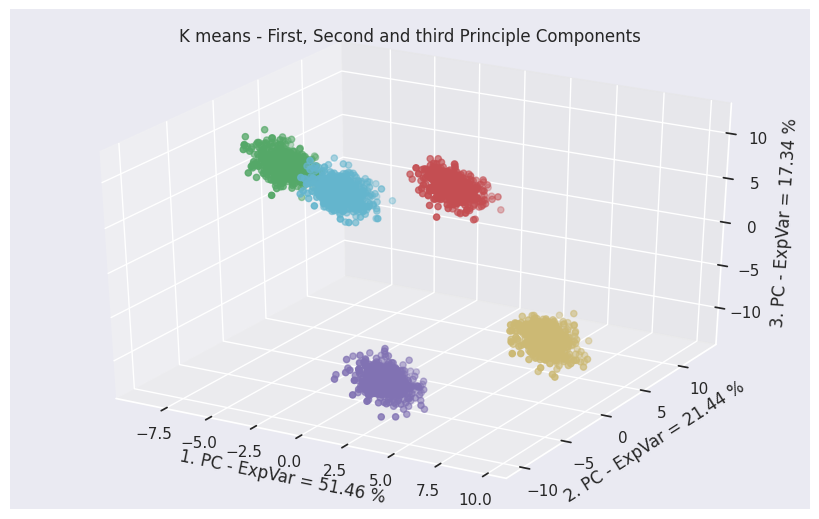

In [ ]:
# 3d kmeans
from mpl_toolkits.mplot3d import Axes3D
import random
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# ax.scatter(xs, ys, zs, marker=m)
clr = ['r', 'c', 'm', 'g', 'y']
for cluster in set(labels_):
    scatterHs.append(ax.scatter(Xred[labels_ == cluster, 0], Xred[labels_ == cluster, 1], Xred[labels_ == cluster, 2], 
                   color=clr[cluster], label='Cluster {}'.format(cluster)))

xlab = '1. PC - ExpVar = {:.2f} %'.format(evals[0]/sum(evals)*100) # determine variance portion
ylab = '2. PC - ExpVar = {:.2f} %'.format(evals[1]/sum(evals)*100)
zlab = '3. PC - ExpVar = {:.2f} %'.format(evals[2]/sum(evals)*100)

ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_zlabel(zlab)
plt.setp(ax, title='K means - First, Second and third Principle Components', xlabel=xlab, ylabel=ylab)

plt.show()

### 3d dbscan


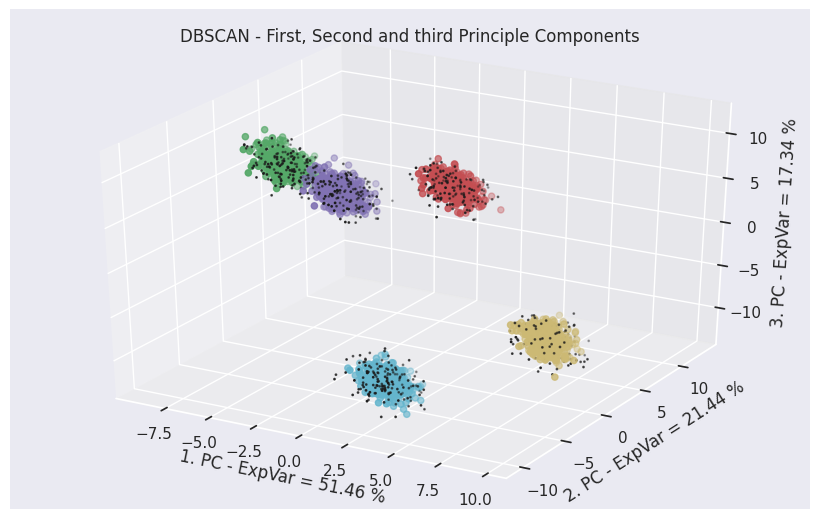

In [ ]:
# 3d dbscan
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# ax.scatter(xs, ys, zs, marker=m)
clr = ['r', 'c', 'm', 'g', 'y']
# for cluster in set(labels):
#     scatterHs.append(ax.scatter(Xred[labels == cluster, 0], Xred[labels == cluster, 1], Xred[labels == cluster, 2], 
#                    color=clr[cluster], label='Cluster {}'.format(cluster)))
for cluster in set(labels):
    class_member_mask = (labels == cluster)
    
    xyz = Xred[class_member_mask & core_samples_mask]
    # plt.plot(xy[:, 0], xy[:, 1],color=clr[cluster], label='Cluster {}'.format(cluster))
    
    ax.scatter(xyz[:, 0], xyz[:, 1],xyz[:,2],color=clr[cluster], 
                                label='Cluster {}'.format(cluster))
    
    xyz = Xred[class_member_mask & ~core_samples_mask]
    ax.scatter(xyz[:, 0], xyz[:, 1],xyz[:,2] ,marker='o', s=1, color='k')

xlab = '1. PC - ExpVar = {:.2f} %'.format(evals[0]/sum(evals)*100) # determine variance portion
ylab = '2. PC - ExpVar = {:.2f} %'.format(evals[1]/sum(evals)*100)
zlab = '3. PC - ExpVar = {:.2f} %'.format(evals[2]/sum(evals)*100)

ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_zlabel(zlab)
plt.setp(ax, title='DBSCAN - First, Second and third Principle Components', xlabel=xlab, ylabel=ylab)

plt.show()

# Comparing

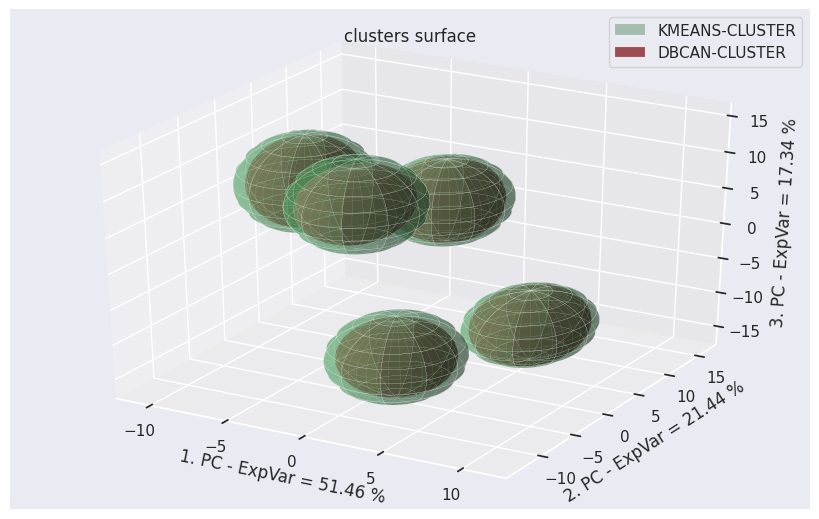

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
 
# scatterHs = []
clr = ['r', 'c', 'm', 'g', 'y']
# # for cluster in set(labels_):
# #     scatterHs.append(ax.scatter(Xred[labels_ == cluster, 0], Xred[labels_ == cluster, 1], 
# #                    color=clr[cluster], label='Cluster {}'.format(cluster)))
 
for cluster in set(labels_):
  
  xyz = Xred[labels_ == cluster]
  x = xyz[:, 0].mean()
  y = xyz[:, 1].mean()
  z = xyz[:, 2].mean()
  ax.scatter(x,y,z ,marker='*', s=60, color='m')
 
  xd = xyz[:, 0].max() - xyz[:, 0].min()
  yd = xyz[:, 1].max() - xyz[:, 1].min()
  zd = xyz[:, 2].max() - xyz[:, 2].min()
 
  
 
  u1 = np.linspace(0, 2 * np.pi, 100)
  v1 = np.linspace(0, np.pi, 100)
 
 
  x_sphere_1 = xd   * np.outer(np.cos(u1), np.sin(v1)) + x
  y_sphere_1 = yd * np.outer(np.sin(u1), np.sin(v1)) + y
  z_sphere_1 = zd * np.outer(np.ones(np.size(u1)), np.cos(v1)) + z
  surf = ax.plot_surface(x_sphere_1, y_sphere_1, z_sphere_1,  label='KMEANS-CLUSTER',
                  rstride=10, cstride=10, linewidth=0.1, color='g', alpha=0.4)
 
  surf._facecolors2d=surf._facecolors3d
  surf._edgecolors2d=surf._edgecolors3d
 
for cluster in set(labels):
  if cluster == -1:
    continue
  class_member_mask = (labels == cluster)
  
  xyz = Xred[class_member_mask & core_samples_mask]
  x = xyz[:, 0].mean()
  y = xyz[:, 1].mean()
  z = xyz[:, 2].mean()
  ax.scatter(x,y,z ,marker='x', color='r')
 
 
 
  xd = xyz[:, 0].max() - xyz[:, 0].min()
  yd = xyz[:, 1].max() - xyz[:, 1].min()
  zd = xyz[:, 2].max() - xyz[:, 2].min()
 
  u1 = np.linspace(0, 2 * np.pi, 100)
  v1 = np.linspace(0, np.pi, 100)
 
 
  x_sphere_1 = xd   * np.outer(np.cos(u1), np.sin(v1)) + x
  y_sphere_1 = yd * np.outer(np.sin(u1), np.sin(v1)) + y
  z_sphere_1 = zd * np.outer(np.ones(np.size(u1)), np.cos(v1)) + z
  surf = ax.plot_surface(x_sphere_1, y_sphere_1, z_sphere_1, label='DBCAN-CLUSTER',
                  rstride=3, cstride=10, linewidth=0.1, color='r', alpha=0.9)
  surf._facecolors2d=surf._facecolors3d
  surf._edgecolors2d=surf._edgecolors3d
xlab = '1. PC - ExpVar = {:.2f} %'.format(evals[0]/sum(evals)*100) # determine variance portion
ylab = '2. PC - ExpVar = {:.2f} %'.format(evals[1]/sum(evals)*100)
zlab = '3. PC - ExpVar = {:.2f} %'.format(evals[2]/sum(evals)*100)
 
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_zlabel(zlab)
plt.setp(ax, title='clusters surface', xlabel=xlab, ylabel=ylab)
 
handles, labels2 = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels2):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list)
plt.show()

In [ ]:
n_samples, n_features = df.shape
# n_digits = len(np.unique(df.target))
# labels = digits.target
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))

df1 = pd.DataFrame([kmeans_metrica ,dbscan_metrica], index =['Kmeans', 'DBscan']) 
df1
# print(82 * '_')
# print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
#       % (name, (time() - t0), estimator.inertia_,
#           metrics.homogeneity_score(labels, estimator.labels_),
#           metrics.completeness_score(labels, estimator.labels_),
#           metrics.v_measure_score(labels, estimator.labels_),
#           metrics.adjusted_rand_score(labels, estimator.labels_),
#           metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
#                                             average_method='arithmetic'),
#           metrics.silhouette_score(data, estimator.labels_,
#                                   metric='euclidean',
#                                   sample_size=sample_size)))
# print(82 * '_')


n_samples 2500, 	 n_features 10


,time,Silhouette Coefficient,Clusters,Noise Points
Kmeans,0.06,0.71,5,-
DBscan,0.23,0.62,5,139
